In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston 
boston_data=load_boston()

In [3]:
boston=pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


In [4]:
boston['Price']=boston_data.target
boston.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [5]:
x=boston_data.data 
y=boston_data.target 

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size =0.2,random_state = 0) 
   
print("xtrain shape: ", xtrain.shape) 
print("xtest shape: ", xtest.shape) 
print("ytrain shape: ", ytrain.shape) 
print("ytest shape: ", ytest.shape)

xtrain shape:  (404, 13)
xtest shape:  (102, 13)
ytrain shape:  (404,)
ytest shape:  (102,)


In [6]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

y_pred = lr.predict(xtest)

In [7]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error: ', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(ytest, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R squared error: ', r2_score(ytest, y_pred))

Mean Absolute Error:  3.842909220444498
Mean Square Error:  33.44897999767653
RMSE:  5.783509315085135
R squared error:  0.5892223849182507


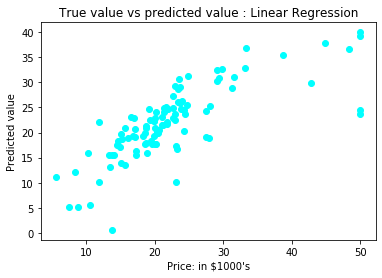

In [8]:
plt.scatter(ytest,y_pred,c='cyan') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

In [9]:
#RIDGE
clf=Ridge(alpha=0.3)
clf.fit(xtrain,ytrain)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
y_pred2 = clf.predict(xtest) 

print('Mean Absolute Error: ', metrics.mean_absolute_error(ytest, y_pred2))
print('Mean Square Error: ', metrics.mean_squared_error(ytest, y_pred2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, y_pred2)))
print('R squared error: ', r2_score(ytest, y_pred2))

Mean Absolute Error:  3.833302523389468
Mean Square Error:  33.736190768885855
RMSE:  5.808286388332264
R squared error:  0.5856952293627944


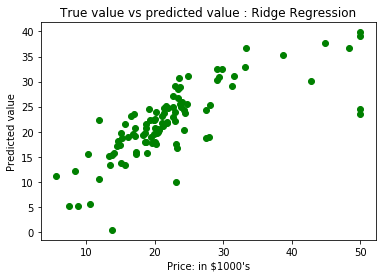

In [11]:
plt.scatter(ytest,y_pred2,c='green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Ridge Regression") 
plt.show()

In [12]:
#LASSO
lso=linear_model.Lasso(alpha=0.001)
lso.fit(xtrain, ytrain)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
y_pred2=lso.predict(xtest) 

print('Mean Absolute Error: ', metrics.mean_absolute_error(ytest, y_pred2))
print('Mean Square Error: ', metrics.mean_squared_error(ytest, y_pred2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, y_pred2)))
print('R squared error: ', r2_score(ytest, y_pred2))

Mean Absolute Error:  3.8416815069088073
Mean Square Error:  33.4790181403956
RMSE:  5.786105610891975
R squared error:  0.5888534948466109


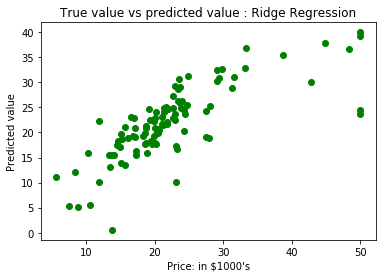

In [14]:
plt.scatter(ytest,y_pred2,c='green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Ridge Regression") 
plt.show()